# Projet 10 : Étude d’une mesure aléatoire
## Joel Tagne Waffo et Justin Moreau


## 1. Construction de la mesure

T1.
1. On suit le processus de construction de l'énoncé:
   
Construction de $μ_1^3 $:  

On divise l’intervalle [0,1[ en 3 intervalles $I_{k_1} = [\frac{k_1−1}{3}, \frac{k_1}{3}[$ pour $k_1 ∈ \{1,2,3\}$ et on pose
$μ_1^3 $ =  $\sum_{{k_1}=1}^{3} W_{k_1}1_{I_{k_1}}\ $

Ainsi $μ_1^3 $ est une mesure aléatoire dont la densité par rapport à la mesure de Lebesgue vaut $ W_{k_1} $
sur l’intervalle $ I_{k_1} $

A partir de cela, construisons $μ_2^3 $ :

Chaque intervalle $ I_{k_1} $  est subdivisé de la même manière en 3 intervalles $ I_{k_1,k_2} $ définis pour $k_2 ∈ \{1,2,3\}$ par
$ I_{k_1,k_2} = [\frac{k_1−1}{3} + \frac{k_2−1}{9} , \frac{k_1-1}{3} + \frac{k_2}{9}[$ et on pose
$μ_2^3  =  \sum_{k_1=1}^{3} \sum_{k_2=1}^{3} W_{k_1}W_{k_1,k_2}1_{I_{k_1,k_2}}\ $


Ainsi $μ_2^3 $ est une mesure aléatoire dont la densité par rapport à la mesure de Lebesgue vaut $ W_{k_1}W_{k_1,k_2} $
sur l’intervalle $ I_{k_1,k_2} $

On a : $[\frac{4}{9}, \frac{5}{9}[ =  I_{2,2} $

La mesure de Lebesgue de $I_{2,2}$  est $\frac{1}{9} $

Et la densité par rapport à la mesure de Lebesgue de $μ_2^3 $ est $ W_{2}W_{2,2} $ sur $ I_{2,2} $

On en déduit:

$μ_2^3 ([\frac{4}{9}, \frac{5}{9}[)  = \frac{W_2*W_{2,2}}{9} $



2. Calculons la masse totale.
   
On a $μ_n^r \sum_{k_1, k_2, \ldots, k_n = 1}^{r} W_{k_1} W_{k_1, k_2} \cdots W_{k_1, k_2, \ldots, k_n} 1_{I_{k_1, k_2, \ldots, k_n}} $

$Z_n^r = μ_n^r([0,1[) $

D'où : $Z_n^r = \sum_{k_1, k_2, \ldots, k_n = 1}^{r} W_{k_1} W_{k_1, k_2} \cdots W_{k_1, k_2, \ldots, k_n} 1_{I_{k_1, k_2, \ldots, k_n}}([0,1[) $

Par itération, on peut écrire $I_{k_1, k_2, \ldots, k_n} $ sous forme explicite, on aboutit à : 

$I_{k_1, k_2, \ldots, k_n} = [\sum_{i=1}^{n} \frac{k_i-1}{r^i},\sum_{i=1}^{n-1} \frac{k_i-1}{r^i} + \frac{k_n}{r^n} [ $

On en déduit que la mesure de Lebesgue de l'intervalle $I_{k_1, k_2, \ldots, k_n} $ vaut $ \frac{1}{r^n} $

Comme on a : $ 1_{I_{k_1, k_2, \ldots, k_n}}([0,1[) $ = 1 toujours, on en déduit la valeur de la masse totale:

$Z_n^r = \frac{1}{r^n}\sum_{k_1, k_2, \ldots, k_n = 1}^{r} W_{k_1} W_{k_1, k_2} \cdots W_{k_1, k_2, \ldots, k_n} $


3. Calculons l'espérance de cette variable aléatoire:

Par linéarité de l'espérance, on a :

$ \mathbb{E}[Z_n^r] = \frac{1}{r^n}\sum_{k_1, k_2, \ldots, k_n = 1}^{r} \mathbb{E}[W_{k_1} W_{k_1, k_2} \cdots W_{k_1, k_2, \ldots, k_n}] $

Puis par l'indépendance des $ W_{k_1} W_{k_1, k_2} \cdots W_{k_1, k_2, \ldots, k_n} $: 

$ \mathbb{E}[Z_n^r] = \frac{1}{r^n}\sum_{k_1, k_2, \ldots, k_n = 1}^{r} \mathbb{E}[W_{k_1}] \mathbb{E}[W_{k_1, k_2}] \cdots \mathbb{E}[W_{k_1, k_2, \ldots, k_n}] $

On a toujours $ \mathbb{E}[W] = 1 $, donc:

$ \mathbb{E}[Z_n^r] = \frac{1}{r^n}\sum_{k_1, k_2, \ldots, k_n = 1}^{r} 1 $

Puis:

$ \mathbb{E}[Z_n^r] = 1 $


In [14]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as npr
import scipy.stats as sps


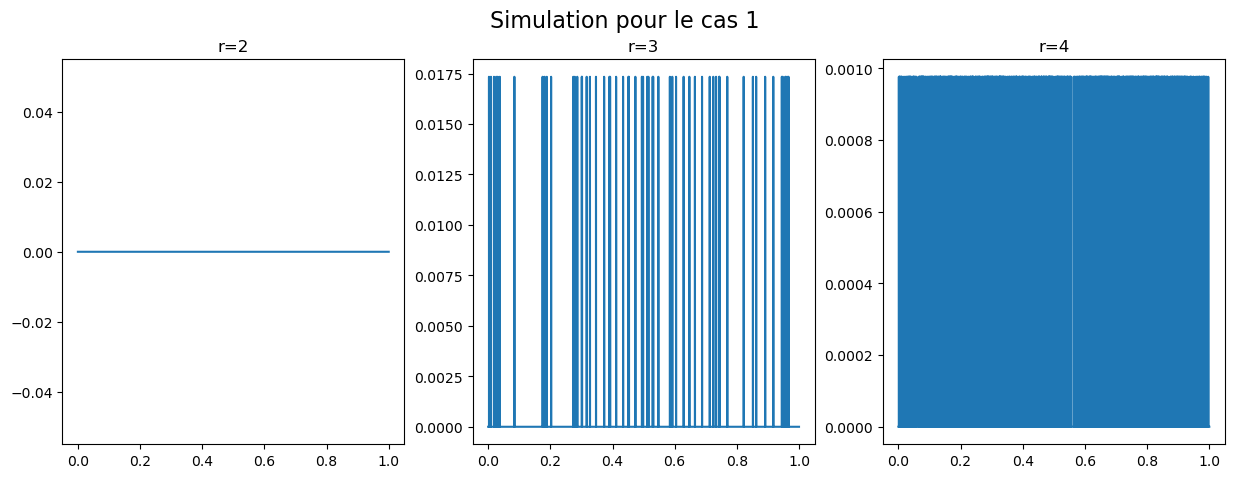

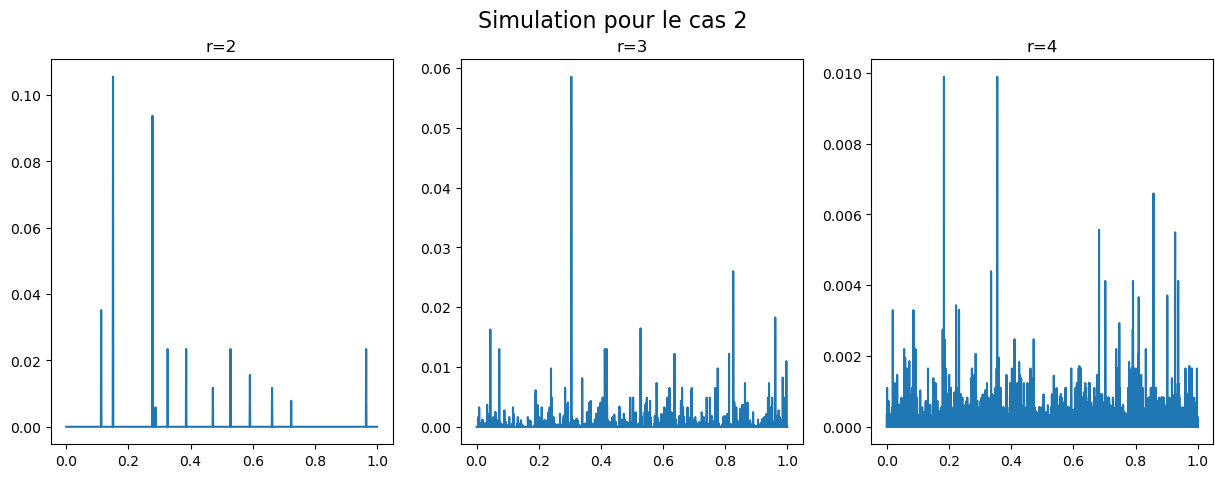

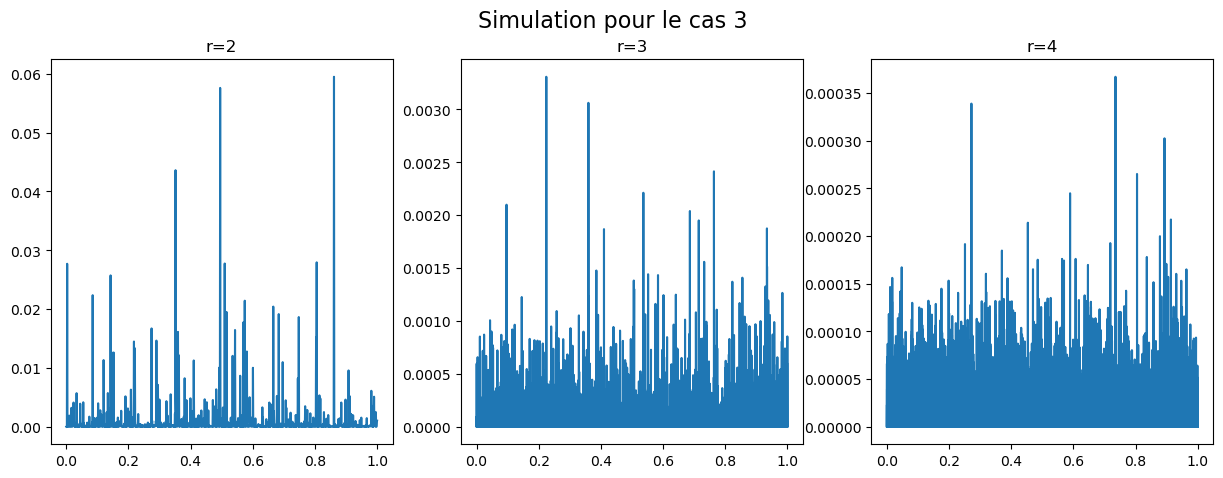

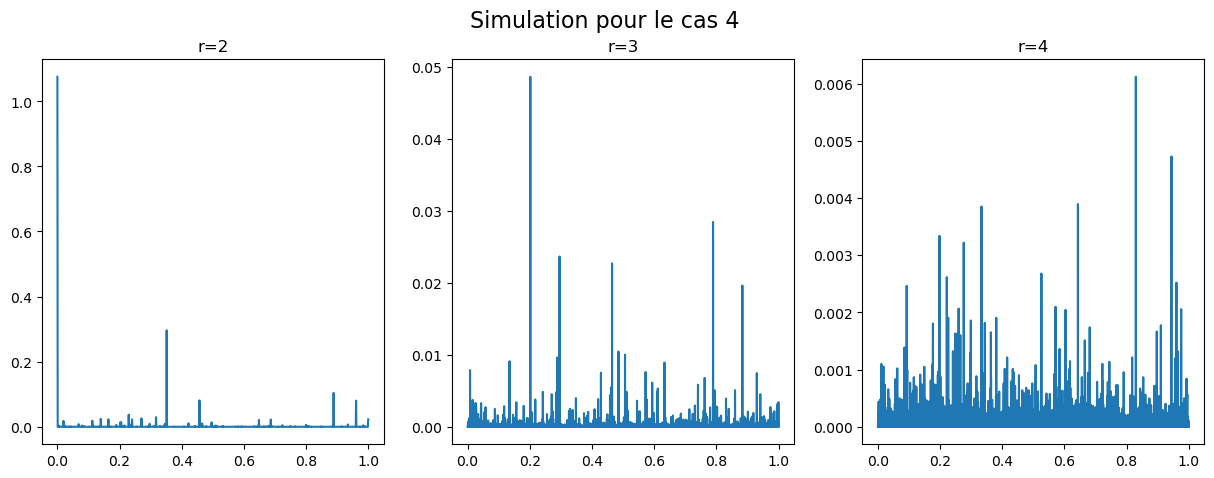

In [16]:
### fonction qui renvoie W selon la loi choisie, on a quatre cas 
def X(n):
    if n == 1:
        return npr.choice([0, 2], p=[0.5, 0.5])
    elif n == 2:
        return npr.poisson(1)
    elif n == 3:
        return npr.uniform(0, 2)
    elif n == 4:
        return npr.exponential(1)

                          
                          
def mu(r,n,loi):
    mu = 1/(r)**n
    for i in range(n):
        mu = mu*X(loi)
    return mu

r = [2,3,4]
n = 10
N = 1000

for k in range(1,5):
    fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
    fig.suptitle(f'Simulation pour le cas {k}', fontsize=16)
    
    for i, elem in enumerate(r):
        abcisse = np.linspace(0,1,elem**n+1)
        ordonnee = []
        for _ in range(0, elem**n + 1):
            ordonnee += [mu(elem,n,k)]
        axs[i].plot(abcisse,ordonnee)
        axs[i].set_title(f'r={elem}')
    
    plt.show()

Commentaire sur les densités: 
Pour toutes les lois, quand r augmente, la mesure est non nulle sur un nombre plus grand d'intervalle, et donc est de valeur plus faible (c'est cohérent car son intégrale doit être égale à 1).

Pour la loi de Bernoulli (cas 1), la mesure décrit des paliers: si elle est non nulle, elle vaut toujours la même valeur. Cela correspond bien à une expérience de Bernoulli. 

Pour la loi de Poisson (cas 2), (notamment r =2) la mesure est nulle presque partout et est non nulle de manière ponctuelle, c'est la description typique d'un processus poissonnien. 

Pour la loi Uniforme sur $[0,2]$, (cas 3), pour tout r, la mesure ne s'annule presque jamais. C'est cohérent car la distribution uniforme ne prend presque jamais la valeur 0. 

Pour la loi exponentielle (cas 4), la mesure est proche de la loi de Poisson (cas 2), ce qui est cohérent car la loi exponentielle est une version continue de la loi de Poisson. 

On voit donc que la loi de $W$ modifie la densité de la mesure. 

In [6]:
def Z(r,n,loi):
    Z = 0
    for i in range(0,r**n):
        Z += mu(r,n,loi)
    return Z
n=10
N=1000
for k in range(1,5):
    simulation = []
    MN = 0;
    for i in range(0,N):
        simulation += [Z(2,n,k)]
        MN += simulation[i]/N
    print("Pour r = 2, n = 10, N = 1000, pour le cas",k,"on a MN =",MN)

Pour r = 2, n = 10, N = 1000, pour le cas 1 on a MN = 1.0050000000000006
Pour r = 2, n = 10, N = 1000, pour le cas 2 on a MN = 0.9832324218749994
Pour r = 2, n = 10, N = 1000, pour le cas 3 on a MN = 1.0023988056402744
Pour r = 2, n = 10, N = 1000, pour le cas 4 on a MN = 0.967659371844785


On observe que quelle que soit la loi de W, la moyenne empirique est proche de 1, cela confirme le calcul qu'on a fait auparavant. Si on augmente encore N, on pourrait se rapprocher encore plus de 1. 

## 2. Etude de $ Z_1^r $

T2.

1. On utilise la formule explicite de $ Z_1^r $ obtenue à la question précédente.

On a : $ Z_1^r = \frac{1}{r^1}\sum_{k_1 = 1}^{r} W_{k_1} $

Les $W_{k_1} $ sont iid et intégrables d'après l'énoncé.

Par la loi forte des grands nombres:

$ Z_1^r = \frac{1}{r}\sum_{k_1 = 1}^{r} W_{k_1}  \xrightarrow{r \to \infty} \mathbb{E}[W] = 1 $ presque sûrement. 

2. On utilise le théorème central limite.

Pour cela, même si ce n'est pas spécifié par l'énoncé, on suppose que $ W \in L^2 $

Ainsi, puisque les Les $W_{k_1} $ sont iid et de carré intégrable, d'espérance 1 et de variance $ \sigma^2 $, on applique le théorème de la limite centrale, et on a :

$ \sqrt{r} (\frac{1}{r}\sum_{k_1 = 1}^{r} W_{k_1} - \mathbb{E}[W]) \xrightarrow{L} \mathcal{N}(0, \sigma^2) $

D'où

$ \sqrt{r} (Z_1^r - 1) \xrightarrow{L} \mathcal{N}(0, \sigma^2) $

3. On veut expliciter $ \sigma^2 $

$ \sigma^2 = \mathrm{Var}(W) $

$ \sigma^2 = \mathbb{E}[W^2] - \mathbb{E}[W]^2 $

$ \sigma^2 = \mathbb{E}[W^2] - 1 $ 

Calculons $ \sigma^2 $ pour chaque loi: 

1. $  W \in \{0, 2\}  \ et \ P(W = 0) = P(W = 2) = \frac{1}{2}  $

On a $  W^2 \in \{0, 4\} \ et \ P(W = 0) = P(W = 4) = \frac{1}{2} $

D'où $ \mathbb{E}[W^2] = 2 $

Et $ \sigma^2 = 1 $
    

2. $ W $ est une variable aléatoire de Poisson de paramètre 1 :
   
$ \mathrm{Var}(W) $ = 1

Et $ \sigma^2 = 1 $

3. $ W$ suit la loi uniforme sur $[0, 2]$ :
   
$ \mathrm{Var}(W) = \frac{(2-0)^2}{12} $

$ \mathrm{Var}(W) = \frac{1}{3} $

Et $ \sigma^2 = \frac{1}{3} $

4. $ W $ suit la loi exponentielle de paramètre 1 :

$ \mathrm{Var}(W) = 1 $

Et $ \sigma^2 = 1 $


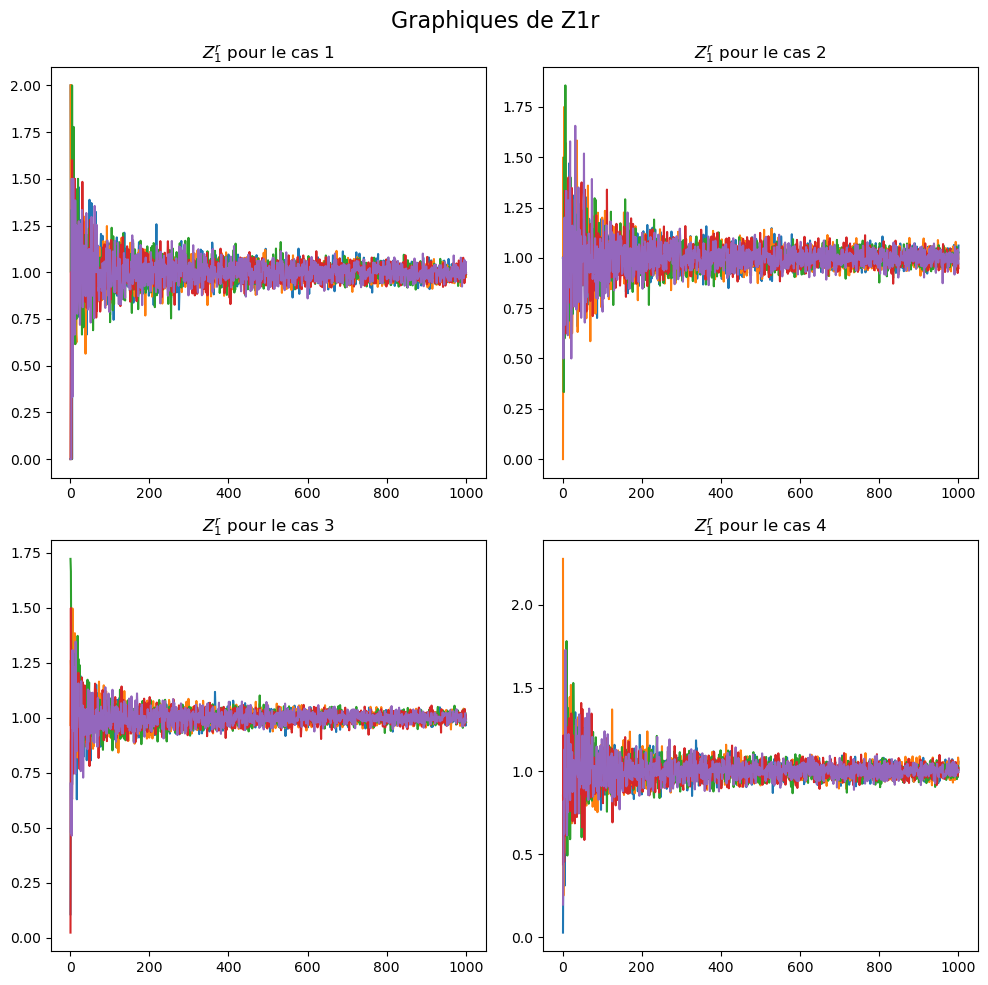

In [19]:
abcisse2 = list(range(1,1001,1))

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10)) 

for k in range(1,5):
    ax = axs[(k-1)//2, (k-1)%2]
    for _ in range(5):
        ordonnee2 = []
        for i in range (0,1000):
            ordonnee2 += [Z(abcisse2[i],1,k)]
        ax.plot(abcisse2,ordonnee2)
    ax.set_title(f'$Z_1^r$ pour le cas {k}')

fig.suptitle('Graphiques de $Z_1^r$', fontsize=16)

fig.tight_layout()  

plt.show()

Ces quatre courbes obtenues nous montrent bien la convergence de $Z_1^r$ vers 1 presque sûrement quelle que soit la loi suivie par $W$. 

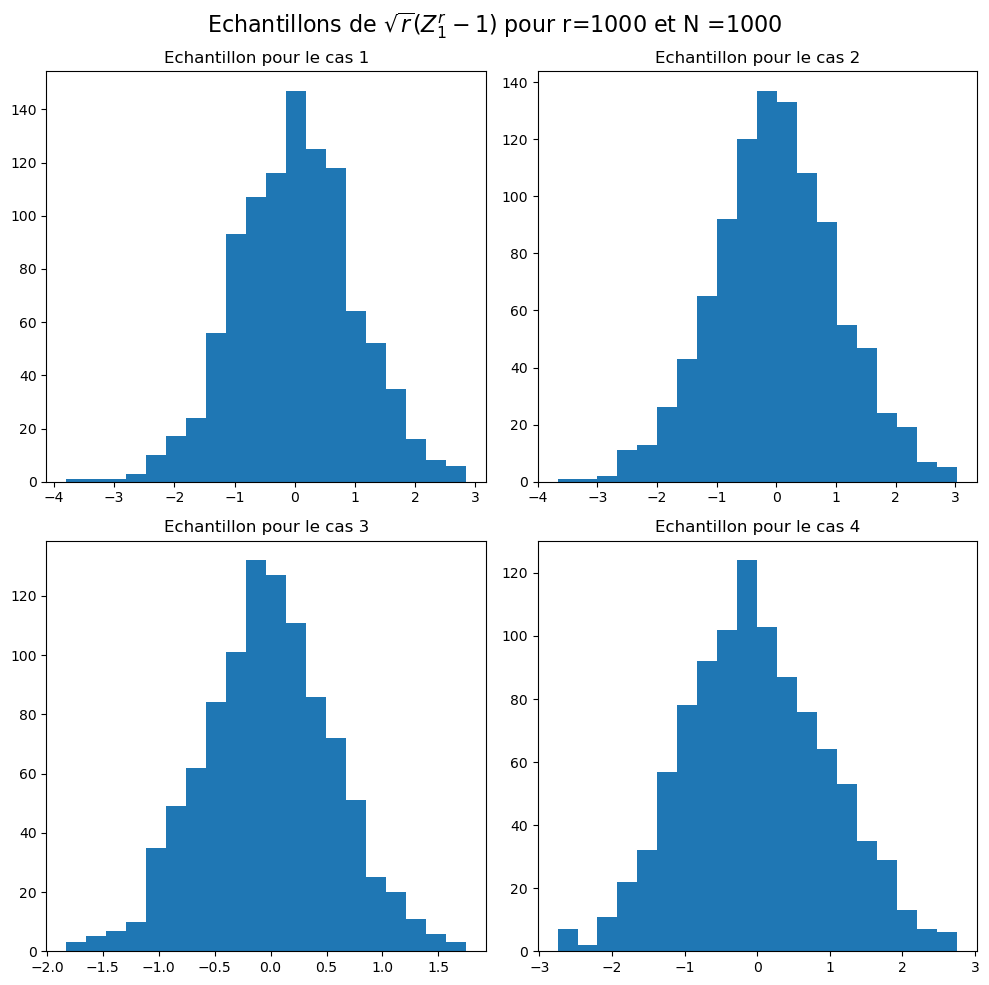

In [21]:
r=1000
N =1000

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10)) 

for k in range(1,5):
    ax = axs[(k-1)//2, (k-1)%2]
    echantillon = []
    for _ in range(N):
        echantillon += [(r**0.5)*(Z(r, 1,k)-1)]
    ax.hist(echantillon,bins=20)
    ax.set_title(f'Echantillon pour le cas {k}')
    
fig.suptitle('Echantillons de $ \sqrt{r} (Z_1^r - 1)$ pour r=1000 et N =1000', fontsize=16)

fig.tight_layout() 
plt.show()

Commentaires sur les figures : 
Les échantillons montrent bien une répartitition gaussienne centrée, comme attendu.
On remarque que, pour le cas 3, la loi uniforme, la variance est bien plus faible que les autres, et la gaussienne est plus resserrée. C'est bien ce qui était attendu puisqu'on a calculé $ \sigma^2 $ pour chaque loi et que celle de la loi uniforme était plus faible. 

## 3. Etude de $ Z_2^r $

T3. On a d'après la question T1: $Z_2^r = \frac{1}{r^2}\sum_{k=1}^{r} \sum_{j=1}^{r} W_{k} W_{k,j} $

Puis $Z_2^r = \frac{1}{r^2}\sum_{k=1}^{r} W_{k} \sum_{j=1}^{r}  W_{k,j} $

$Z_2^r = \frac{1}{r}\sum_{k=1}^{r} W_{k} (\frac{1}{r}\sum_{j=1}^{r}  W_{k,j}) $

Or on a : $ Z_1^r = \frac{1}{r}\sum_{k_1 = 1}^{r} W_{k_1} $

On pose donc $ Z_{1,k}^r = \frac{1}{r^1}\sum_{k_1 = 1}^{r} W_{k_1,k} $

Les $ Z_{1,k}^r $ sont bien iid de même loi que $ Z_1^r$

Elles sont bien indépendantes des $ W_i $ car d'après l'énoncé les $ (W_i)_{i \geq 1}$ et les $ (W_{i_1, i_2})_{i_1 \geq 1, i_2 \geq 1} $ sont indépendantes. 

On a donc presque sûrement: $Z_2^r = \frac{1}{r}\sum_{k=1}^{r} W_{k} Z_{1,k}^r $


T4. Soit $ Y_r$  est une suite de variables aléatoires centrées telle qu'il existe $ k \geq 1 $ pour lequel la série en $ r $ de terme général $\frac{\mathbb{E}[|Y_r|^k]}{r^k} $  est convergente.


Soit $ \varepsilon > 0 $

Par l'inégalité de Markov (on suppose que les moments de $ Y_r$  existent) :

$ \mathbb{P}(|Y_r|>\varepsilon r) \leq \frac{\mathbb{E}[|Y_r|^k]}{(\varepsilon r)^k}$

Comme la série en $ r $ de terme général $\frac{\mathbb{E}[|Y_r|^k]}{r^k} $  est convergente, on peut sommer l'inégalité : 

$ \sum_{r=1}^{\infty} \mathbb{P}(|Y_r|>\varepsilon r) \leq \frac{1}{\varepsilon^k}\sum_{r=1}^{\infty} \frac{\mathbb{E}[|Y_r|^k]}{r^k}$

D'où $ \sum_{r=1}^{\infty} \mathbb{P}(|Y_r|>\varepsilon r) < +\infty \ $

D'après le lemme de Borel-Cantelli, il y a au plus un nombre fini de $ \{{|Y_r|>\varepsilon r}\}_{r \geq 1} $ qui se réalisent 

Donc il existe $r_0 \in \mathbb{N} $ tel que pour tout $r \geq r_0$,  $|Y_r|\leq\varepsilon r $

Ceci est vrai pour tout $ \varepsilon > 0 $

Lorsqu'on fait tendre $\varepsilon$ vers 0, on a alors: 

pour tout $r \geq r_0$,  $Y_r = 0 $

Ainsi $ \mathbb{P}( \underset{r \to \infty}{\lim} |Y_r| = 0) = 1 $ et $Y_r $ converge presque sûrement vers 0. 


T5. 

1. On a $Z_2^r - 1= \frac{1}{r}\sum_{k=1}^{r} W_{k} Z_{1,k}^r - 1 $

$Z_2^r - 1= \frac{1}{r}\sum_{k=1}^{r} W_{k} Z_{1,k}^r - \frac{1}{r}\sum_{k=1}^{r} W_{k} +\frac{1}{r}\sum_{k=1}^{r} W_{k}  - 1 $

$Z_2^r - 1= \frac{1}{r}\sum_{k=1}^{r} (W_{k} Z_{1,k}^r - W_{k}) +\frac{1}{r}\sum_{k=1}^{r} W_{k}  - 1 $

D'où: 

$Z_2^r - 1= \frac{1}{r}\sum_{k=1}^{r} W_{k}(Z_{1,k}^r - 1) +\frac{1}{r}\sum_{k=1}^{r} W_{k}  - 1 $

2. On pose $Y_r = \frac{1}{r}\sum_{k=1}^{r} W_{k}(Z_{1,k}^r - 1) $

Montrons que les $Y_r$ sont centrées. On a, par linéarité de l'espérance et indépendance des $ Z_{1,k}^r $ et $ W_k $

$ \mathbb{E}(Y_r)= \frac{1}{r}\sum_{k=1}^{r} \mathbb{E}(W_{k})(\mathbb{E}(Z_{1,k}^r) - 1) $

Or $ \mathbb{E}(Z_{1,k}^r) = 1$ 

D'où $ \mathbb{E}(Y_r)= 0 $ 

On cherche maintenant à montrer que la deuxième condition (avec k=1) est satisfaite pour pouvoir utiliser le résultat de la question T4

$ \frac{\mathbb{E}[|Y_r|]}{r} = \frac{1}{r^2}\mathbb{E}(|\sum_{k=1}^{r} W_{k}(Z_{1,k}^r - 1)| )$

Par inégalité triangulaire : $ |\sum_{k=1}^{r} W_{k}(Z_{1,k}^r - 1)| \leq \sum_{k=1}^{r} |W_{k}(Z_{1,k}^r - 1)|$

Puis par croissance de l'espérance:

$ \frac{\mathbb{E}[|Y_r|]}{r} \leq \frac{1}{r^2}\mathbb{E}(\sum_{k=1}^{r} |W_{k}(Z_{1,k}^r - 1)| )$

Par linéarité:

$ \frac{\mathbb{E}[|Y_r|]}{r} \leq \frac{1}{r^2} \sum_{k=1}^{r} \mathbb{E}(|W_{k}(Z_{1,k}^r - 1)|) )$

Par indépendance et comme $W \geq 0 $

$ \frac{\mathbb{E}[|Y_r|]}{r} \leq \frac{1}{r^2} \sum_{k=1}^{r} \mathbb{E}(W_{k})\mathbb{E}(|Z_{1,k}^r - 1|)$

D'où, comme $ \mathbb{E}(W) = 1 $

$ \frac{\mathbb{E}[|Y_r|]}{r} \leq \frac{1}{r^2} \sum_{k=1}^{r} \mathbb{E}(|Z_{1,k}^r - 1|)$


Or $\mathbb{E}(|Z_{1,k}^r - 1|)^2 \leq \mathbb{E}(|Z_{1,k}^r - 1|^2) = \mathrm{Var}(Z_{1}^r)$

Or $ Z_1^r = \frac{1}{r}\sum_{k_1 = 1}^{r} W_{k_1} $

Comme les $ W_{k_1} $ sont indépendantes:

$ \mathrm{Var}(Z_{1}^r) = \frac{1}{r}\mathrm{Var}(W) = \frac{1}{r}\sigma^2$

On reprend l'inégalité globale:


$ \frac{\mathbb{E}[|Y_r|]}{r} \leq \frac{1}{r^2} \sum_{k=1}^{r} \frac{1}{\sqrt{r}}\sigma$

$ \frac{\mathbb{E}[|Y_r|]}{r} \leq \frac{\sigma}{r\sqrt{r}} $

Par comparaison, la série $\frac{\mathbb{E}[|Y_r|^k]}{r^k} $  est convergente avec k = 1. 

On peut donc appliquer le résultat de la question T4. On en conclut que $ \frac{1}{r}\sum_{k=1}^{r} W_{k}(Z_{1,k}^r - 1) $ converge presque sûrement vers 0.

3. On a $Z_2^r - 1= \frac{1}{r}\sum_{k=1}^{r} W_{k}(Z_{1,k}^r - 1) +Z_1^r  - 1 $

D'après le résultat que l'on vient de voir et comme $Z_1^r$ converge presque sûrement vers 1, on a :

$Z_2^r - 1 $ converge presque sûrement vers 0

Puis $Z_2^r$ converge presque sûrement vers 1

T6. 

1. D'après la question T5.2., on a : 

$Y_r = \frac{1}{r}\sum_{k=1}^{r} W_{k}(Z_{1,k}^r - 1) $ qui converge presque sûrement vers 0.

Soit $ \varepsilon > 0 : \mathbb{P}(|Y_r| > \varepsilon) \xrightarrow{r \to +\infty} 0 $ (la convergence presque sûre implique la convergence en probabilité)

On a $ \mathbb{P}(\sqrt{r}|Y_r| > \varepsilon) = \mathbb{P}(|Y_r| > \frac{\varepsilon}{\sqrt{r}})$

On pose alors $\varepsilon_r = \frac{\varepsilon}{\sqrt{r}} $

Comme $Y_r$ converge en probabilité vers 0, en particulier:

$\mathbb{P}(|Y_r| > \varepsilon_r) \xrightarrow{r \to +\infty} 0 $

C'est à dire : $\mathbb{P}(\sqrt{r}|Y_r| > \varepsilon) \xrightarrow{r \to +\infty} 0 $

Donc $ \sqrt{r}(\frac{1}{r}\sum_{k=1}^{r} W_{k}(Z_{1,k}^r - 1)) $ converge en probabilité vers 0.

2. On a $\sqrt{r}(Z_2^r - 1)= \sqrt{r}(\frac{1}{r}\sum_{k=1}^{r} W_{k}(Z_{1,k}^r - 1)) + \sqrt{r}(Z_1^r  - 1) $

D'après ce qu'on vient de démontrer, le premier terme converge en probabilité, donc en loi vers 0. 

D'après la question T2, $ \sqrt{r}(Z_1^r  - 1) $ converge en loi vers une gaussienne centrée et de variance $\sigma^2$

D'après le lemme de Slutsky: $\sqrt{r}(Z_2^r - 1) $ converge en loi vers une variable aléatoire gaussienne de variance  $\sigma^2$

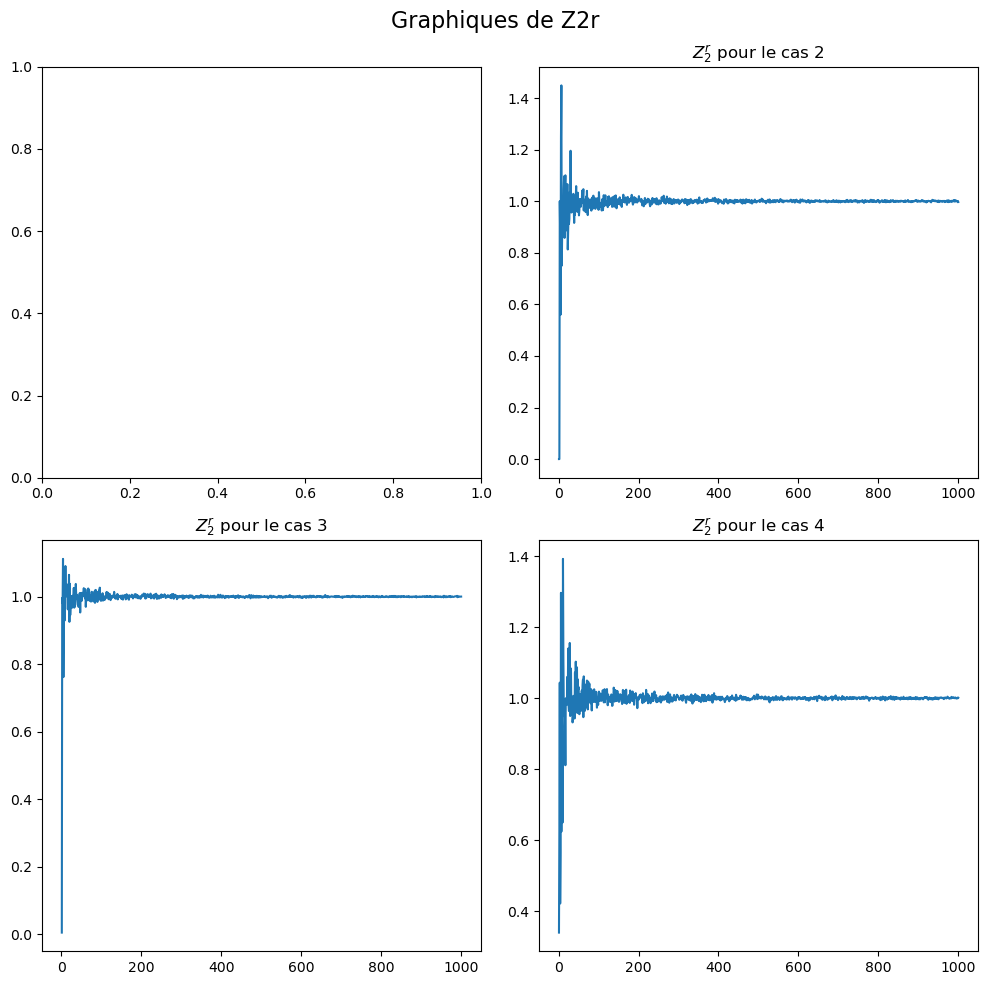

In [60]:
abcisse2 = list(range(1,1001,1))

def Z(r,n,loi):
    Z = 0
    for i in range(0,r**n):
        Z += mu(r,n,loi)
    return Z

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10)) 

for k in range(1,5):
        ax = axs[(k-1)//2, (k-1)%2]
        ordonnee2 = []
        for i in range (0,1000):
            ordonnee2 += [Z(abcisse2[i],2,k)]
        ax.plot(abcisse2,ordonnee2)
        ax.set_title(f'$Z_2^r$ pour le cas {k}')

fig.suptitle('Graphiques de $Z_2^r$', fontsize=16)

fig.tight_layout()  

plt.show()


Commentaires:

Tout d'abord, nous avons été limité par la puissance de calcul de notre équipement, on fait ici pour chaque cas un nombre de simulation très très élevé. Les trois courbes obtenues ont été calculées en plus d'une heure.

Pour cette raison:

Nous n'avons pas pu obtenir la courbe quand $W$ suit une loi de Bernoulli (on s'attend néanmoins à observer le même comportement que les autres courbes, comme le prévoit la théorie)

Pour les autres cas, nous avons tracé une seule courbe de $Z_2^r $ et non cinq.

Néanmoins, les trois courbes obtenues nous montrent bien la convergence de $Z_2^r$ vers 1 presque sûrement quelle que soit la loi suivie par $W$. 

In [ ]:
r=1000
N =1000

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10)) 

for k in range(1,5):
    ax = axs[(k-1)//2, (k-1)%2]
    echantillon = []
    for _ in range(N):
        echantillon += [(r**0.5)*(Z(r,2,k)-1)]
    ax.hist(echantillon,bins=20)
    ax.set_title(f'Echantillon pour le cas {k}')
  
fig.suptitle('Echantillons de $ \sqrt{r} (Z_2^r - 1)$ pour r=1000 et N =1000', fontsize=16)

fig.tight_layout() 
plt.show()


Commentaires sur les figures : 

Comme à la question précédente, nous avons été limité par la puissance de calcul (compilation de quatre heures).
Nous avons été forcé d'arrêter la simulation pour obtenir le résultat ci-dessus. 


Les échantillons montrent bien une répartition gaussienne centrée, comme attendu.
On remarque que, pour le cas 3, la loi uniforme, la variance est bien plus faible que les autres, et la gaussienne est plus resserrée. C'est bien ce qui était attendu puisqu'on a calculé $ \sigma^2 $ pour chaque loi et que celle de la loi uniforme était plus faible. 

## 4. Loi du nombre d'intervalle pour lequel la densité est non nulle

### 4.1. Etude de $Y_1^r $ 

T7.

1. Ayant subdivisé l'intervalle $[0,1]$ en $r$ intervalles de longueur $\frac{1}{r}$, sur chacun de ces intervalles , $\mu_1^r$ est soit non nulle avec probabilité $\mathbb{P} (W >0)$ soit  nulle avec probabilité $\mathbb{P} (W =0)$. 
Ainsi pour tout $ \forall k \in \{1,...,r\},  \mathbb{P} (Y_1^r = k)= \binom{r}{k} \mathbb{P} (W >0) ^k  \mathbb{P} (W =0) ^{r-k}$.
* Cas où $W$ suit  $Unif \{0, 2 \}$,
$Y_1^r$ suit une $B(r,\frac{1}{2})$  car $\mathbb{P} (W >0) = \mathbb{P} (W =2) =\frac{1}{2}$
* Cas où $W$ suit  $P(1)$,
$Y_1^r$ suit une $B(r,1-e^{-1})$ 

2.Soit $(Y_1^r(i))_{1\leq i \leq N}$ un $N$ échantillon de $Y_1^r$
. On note $q_k = \mathbb{P}(Y_1^r = k)$ et $\widehat{q_k} =\frac{1}{N} \sum_{i=1}^N \ 1_{\{Y_1^r(i) = k\}}$
Soit $q = 
\begin{pmatrix}
q_0 \\[3mm]
\vdots \\[3mm]
q_r \\
\end{pmatrix}
$  et 
$ \widehat{q} = 
\begin{pmatrix}
\widehat{q_0} \\[3mm]
\vdots \\[3mm]
\widehat{q_r} \\
\end{pmatrix}
$

(a) Convergence presque sûre de $ \widehat{q}$ vers $q$

Prenons 
 $ X(i) =
\begin{pmatrix}
1_{\{Y_1^r(i) = 0\}}\\
\vdots\\[3mm]
 1_{\{Y_1^r(i) = r\}}\\[3mm]
\end{pmatrix}$

les $X(i)$ sont $iid$ car le $N$ échantillon $(Y_1^r(i))_{1\leq i \leq N}$ est $iid$. De plus les indicatrices étant intégrables, on a 

$
\mathbb{E}[X(i)] = $
$
\begin{pmatrix}
\mathbb{E}[1_{\{Y_1^r(i) = 0\}}]\\
\vdots\\[3mm]
 \mathbb{E}[1_{\{Y_1^r(i) = r\}}]\\[3mm]
\end{pmatrix} = $
$
\begin{pmatrix}
\mathbb{P}[Y_1^r(i) = 0]\\
\vdots\\[3mm]
 \mathbb{P}[Y_1^r(i) = r]\\[3mm]
\end{pmatrix} = $
$ 
\begin{pmatrix}
q_0\\
\vdots\\[3mm]
 q_r\\[3mm]
\end{pmatrix} $



Ainsi par $\textbf {la loi forte des grands nombres}$
on a $\frac{1}{N} \sum_{i=1}^N \ X(i) = \widehat{q}= 
\begin{pmatrix}
\widehat{q_0} \\[3mm]
\vdots \\[3mm]
\widehat{q_r} \\
\end{pmatrix}
\overset{p.s}{\longrightarrow} 
\begin{pmatrix}
q_0\\
\vdots\\[3mm]
 q_r\\[3mm]
\end{pmatrix}
= q $


(b) vitesse de  convergence 

Les $X(i)$ définies plus haut sont $iid$ et de carré intégrable donc par le $\textbf {Théorème de la limite centrale multidimentionnel}$, on a 
$\sqrt{N} ( (\frac{1}{N} \sum_{i=1}^N \ X(i)) - q) = \sqrt{N} ( 
\begin{pmatrix}
\widehat{q_0} \\[3mm]
\vdots \\[3mm]
\widehat{q_r} \\
\end{pmatrix} -
\begin{pmatrix}
q_0\\
\vdots\\[3mm]
 q_r\\[3mm]
\end{pmatrix} )
\overset{\mathcal{L}}{\longrightarrow} \mathcal{N}_r (0, C)
$

la matrice de variance covariance est donné par $C = (c_{k,l})_{1\leq k,l \leq r}$ telle que 
$c_{k,l} = Cov(1_{\{Y_1^r = k\}}, 1_{\{Y_1^r = l\}}) = \mathbb{E}[1_{\{Y_1^r = k\}} 1_{\{Y_1^r = l\}}] -\mathbb{E}[1_{\{Y_1^r = k\}}] \mathbb{E}[ 1_{\{Y_1^r = l\}}]  =  \delta_{k,l}q_k - q_kq_l = 
\left \{
\begin{array}{rcl}
q_k(1 - q_k) &si& k=l \\
- q_kq_l &si& k \neq l
\end{array}
\right.$


3. D'après la question précédente,  $ \sqrt{N}(\widehat{q} - q) $ est asymptotiquement égal en loi à un vecteur gaussien.

$\sqrt{N}\sum_{k=0}^{r}(\widehat{q}_k - q_k) $ est une combinaison linéaire des composantes de $ \sqrt{N}(\widehat{q} - q) $, donc converge asymptotiquement en loi vers une gaussienne centrée. 

Si on fait le calcul:

$\sqrt{N}\sum_{k=0}^{r}(\widehat{q}_k - q_k) = \sqrt{N}\sum_{k=0}^{r}\widehat{q}_k - \sqrt{N}\sum_{k=0}^{r}q_k $

$\sqrt{N}\sum_{k=0}^{r}(\widehat{q}_k - q_k) = \sqrt{N}\sum_{k=0}^{r}\frac{1}{N} \sum_{i=1}^N \ 1_{\{Y_1^r(i) = k\}} - \sqrt{N}\sum_{k=0}^{r}\mathbb{P}(Y_1^r = k) $

On permute les sommes finies:

$\sqrt{N}\sum_{k=0}^{r}(\widehat{q}_k - q_k) = \sqrt{N} \sum_{i=1}^N \frac{1}{N} \sum_{k=0}^{r}1_{\{Y_1^r(i) = k\}} - \sqrt{N} $

A $i$ fixé, on a $\sum_{k=0}^{r}1_{\{Y_1^r(i) = k\}} = 1 $

D'où on a 

$\sqrt{N}\sum_{k=0}^{r}(\widehat{q}_k - q_k) = \sqrt{N} - \sqrt{N} $

Puis $\sqrt{N}\sum_{k=0}^{r}(\widehat{q}_k - q_k) = 0 $

On conclut donc que $\sqrt{N}\sum_{k=0}^{r}(\widehat{q}_k - q_k) $ est la loi nulle.


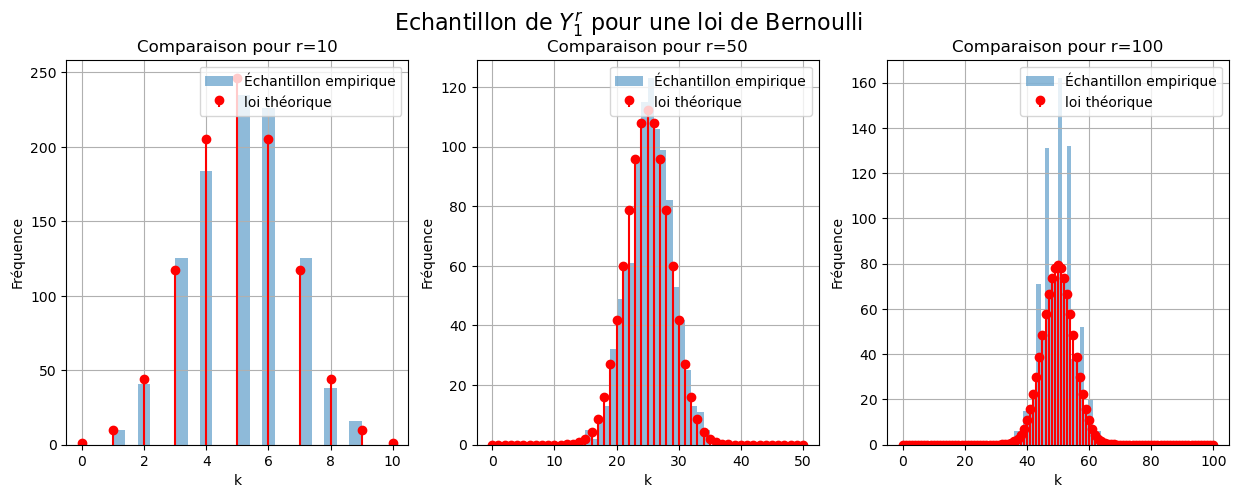

In [55]:
N=1000
valeurs= [10,50,100]

###cas de la loi de Bernoulli
p= 1/2 

bins = 20
fig, axs = plt.subplots(1, 3, figsize=(15, 5)) 

for idx, r in enumerate(valeurs):
    echantillon = sps.binom.rvs(r, p, size=N)
    k = np.arange(0, r+1)
    echantillon2 = sps.binom.pmf(k, r, p) * N
    axs[idx].hist(echantillon, bins=bins, alpha=0.5, label='Échantillon empirique'.format(r))
    axs[idx].stem(k ,echantillon2, linefmt="r", markerfmt="ro", basefmt="None", label="loi théorique")
    axs[idx].set_title('Comparaison pour r={}'.format(r))
    axs[idx].set_xlabel('k')
    axs[idx].set_ylabel('Fréquence')
    axs[idx].legend()
    axs[idx].grid(True)
    
fig.suptitle('Echantillon de $Y_1^r$ pour une loi de Bernoulli' , fontsize=16)
plt.show()

loiempirique = [ 0 for _ in range(r+1)]
for elem in echantillon:
    loiempirique[elem] +=1

echantillon3 = [0 for _ in range(N)]



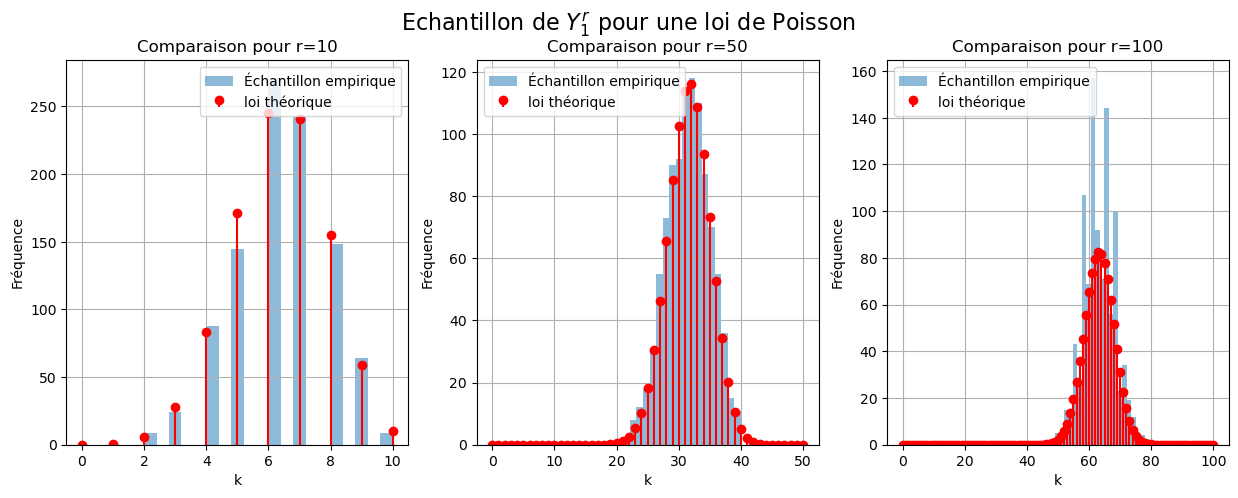

In [56]:
###Cas de la loi de Poisson
p = 1-np.exp(-1)

fig, axs = plt.subplots(1, 3, figsize=(15, 5)) 

for idx, r in enumerate(valeurs):
    echantillon = sps.binom.rvs(r, p, size=N)
    k = np.arange(0, r+1)
    echantillon2 = sps.binom.pmf(k, r, p) * N
    axs[idx].hist(echantillon, bins=bins, alpha=0.5, label='Échantillon empirique'.format(r))
    axs[idx].stem(k ,echantillon2, linefmt="r", markerfmt="ro", basefmt="None", label="loi théorique")
    axs[idx].set_title('Comparaison pour r={}'.format(r))
    axs[idx].set_xlabel('k')
    axs[idx].set_ylabel('Fréquence')
    axs[idx].legend()
    axs[idx].grid(True)
    
fig.suptitle('Echantillon de $Y_1^r$ pour une loi de Poisson' , fontsize=16)
plt.show()

Commentaires:

On observe tout d'abord qu'on a bien la convergence presque sûre des $ \widehat{q}_k $ car la empirique est assez proche de la loi théorique (2.(a))

Néanmoins, on voit que pour N= 1000 et r= 100, les estimateurs sont peu précis dans les deux cas. Ils sont non précis par rapport aux estimateurs pour r = 10 et r = 50 avec le même N=1000.

En effet, on a augmenté r, donc le nombre de valeurs que peut prendre $Y_1^r $, mais on n'a pas augmenté N, ce qui fait que l'échantillon se rapproche moins de la réalité.

Pour avoir un estimateur plus précis, il faudrait augmenter N en fonction de r. 

### 4.2. Etude de $Y_2^r $ 

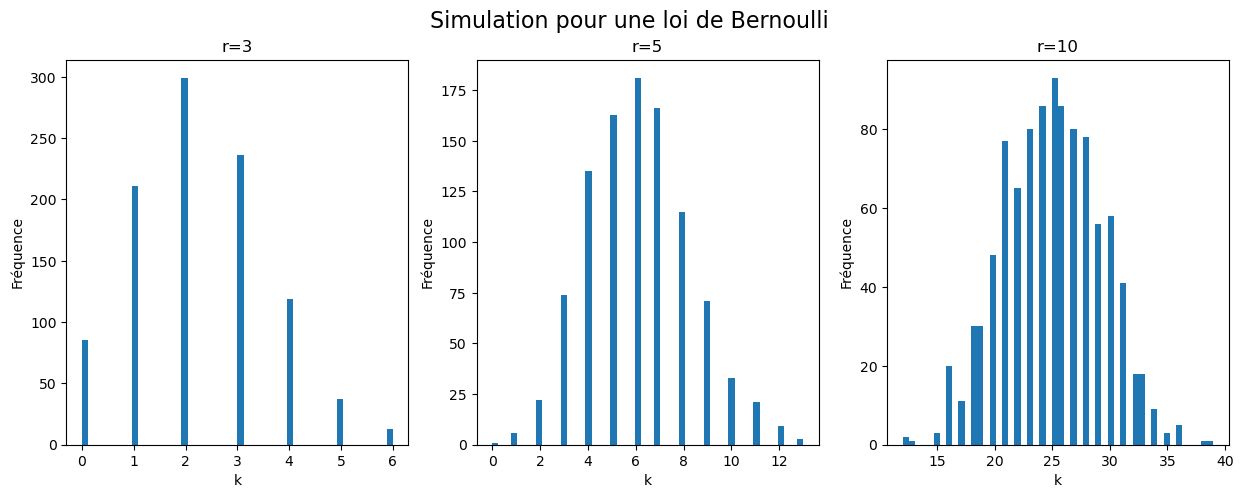

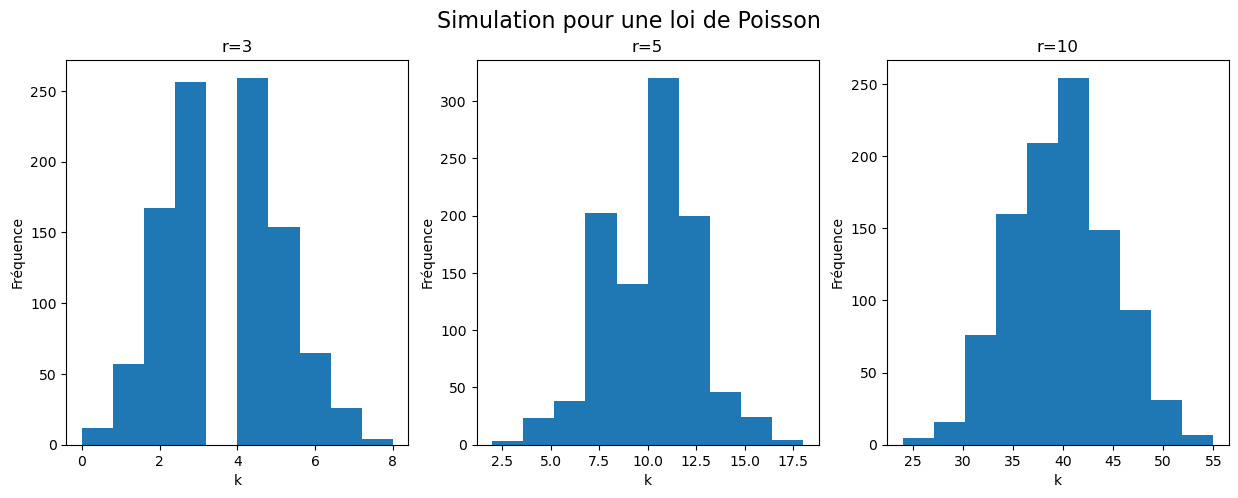

In [54]:
N=1000
r = [3,5,10]

### cas pour la loi de Bernoulli
def Y2(r):
    y = 0
    for _ in range (r**2):
        echantillon = npr.choice([0, 2], p=[0.5, 0.5], size=2)
        produit = echantillon[1]*echantillon[0]
        if (produit > 0):
            y +=1;
    return y

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
fig.suptitle("Simulation pour une loi de Bernoulli", fontsize=16)
for i, elem in enumerate(r): 
    echantillonY2 = []
    for _ in range(N):
        echantillonY2 += [Y2(elem)]
    axs[i].hist(echantillonY2,bins=50)
    axs[i].set_title('r={}'.format(elem))
    axs[i].set_xlabel('k')
    axs[i].set_ylabel('Fréquence')

    

plt.show()
### cas pour la loi de Poisson
def Y22(r):
    y = 0
    for _ in range (r**2):
        echantillon = sps.poisson.rvs(1, size = 2)
        produit = echantillon[1]*echantillon[0]
        if (produit > 0):
            y +=1;
    return y

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
fig.suptitle("Simulation pour une loi de Poisson", fontsize=16)
for i, elem in enumerate(r): 
    echantillonY2 = []
    for _ in range(N):
        echantillonY2 += [Y22(elem)]
    axs[i].hist(echantillonY2,bins=50)
    axs[i].set_title('r={}'.format(elem))
    axs[i].set_xlabel('k')
    axs[i].set_ylabel('Fréquence')

    

plt.show()



Commentaire: on observe que la loi de $Y_2^r $ est assez proche d'une loi binomiale, surtout quand r augmente. Mais on sait que ce n'est pas une loi binomiale. 

T8.1. On raisonne à chaque fois sur les subdivisions de $[0,1]$ de longueur $\frac {1}{3}$ et leurs sous subdivisions de longueur $\frac {1}{3^2}$. On distingue ainsi les cas où  $(W_{k_1})_{k_1 = 1,2,3}$ peut être non nul ou pas sur chacun des intervalles de longueur $\frac {1}{3}$ et pour ces cas on chercher toutes les distribution possible de la mesure aléatoire $\mu_2^3$ sur les sous intervalles e longueur $\frac {1}{3^2}$
On a donc:
* $\mathbb{P} ( Y_2^3 = 9 ) = \mathbb{P} (W \neq 0)^3 \mathbb{P} (W \neq 0)^9 $
* $\mathbb{P} ( Y_2^3 = 8 ) = \mathbb{P} (W \neq 0)^3 \binom{9}{1} \mathbb{P} (W \neq 0)^8 \mathbb{P} (W = 0)   $
* $\mathbb{P} ( Y_2^3 = 7 ) = \mathbb{P} (W \neq 0)^3 \binom{9}{1} \mathbb{P} (W \neq 0)^7 \mathbb{P} (W = 0)^2  $
* $\mathbb{P} ( Y_2^3 = 6 ) = \mathbb{P} (W \neq 0)^3 \times 3 \times \binom{3}{1} \mathbb{P} (W \neq 0) \mathbb{P} (W = 0)^2 \times \binom{6}{3} \mathbb{P} (W \neq 0)^3 \mathbb{P} (W = 0)^3 +  \binom{3}{2} \mathbb{P} (W \neq 0)^2 \mathbb{P} (W = 0) \mathbb{P} (W \neq 0)^6   $

* $\mathbb{P} ( Y_2^3 = 5 ) = \mathbb{P} (W \neq 0)^3 \times 3 \times \binom{3}{1} \mathbb{P} (W \neq 0) \mathbb{P} (W = 0)^2 \times \binom{6}{2} \mathbb{P} (W \neq 0)^2 \mathbb{P} (W = 0)^4 +  \binom{3}{2} \mathbb{P} (W \neq 0)^2 \mathbb{P} (W = 0) \times  \binom{6}{5} \mathbb{P} (W \neq 0)^5 \mathbb{P} (W = 0)  $

* $\mathbb{P} ( Y_2^3 = 4) = \mathbb{P} (W \neq 0)^3 \times 3 \times \binom{3}{1} \mathbb{P} (W \neq 0) \mathbb{P} (W = 0)^2 \times \binom{6}{1} \mathbb{P} (W \neq 0) \mathbb{P} (W = 0)^5 +  \binom{3}{2} \mathbb{P} (W \neq 0)^2 \mathbb{P} (W = 0) \times  \binom{6}{4} \mathbb{P} (W \neq 0)^4 \mathbb{P} (W = 0)^2  $

* $\mathbb{P} ( Y_2^3 = 3) = \mathbb{P} (W \neq 0)^3 \times 3 \times \binom{3}{1} \mathbb{P} (W \neq 0) \mathbb{P} (W = 0)^2  +  \binom{3}{2} \mathbb{P} (W \neq 0)^2 \mathbb{P} (W = 0) \times 2 \times \binom{3}{1} \mathbb{P} (W \neq 0) \mathbb{P} (W = 0)^2 \times \binom{4}{1} \mathbb{P} (W \neq 0) \mathbb{P} (W = 0)^3 +  \binom{3}{1} \mathbb{P} (W \neq 0) \mathbb{P} (W = 0)^2  \mathbb{P} (W \neq 0)^3$


* $\mathbb{P} ( Y_2^3 = 2 ) =  \binom{3}{1} \mathbb{P} (W \neq 0) \mathbb{P} (W = 0)^2 \times \binom{3}{2} \times \mathbb{P} (W \neq 0)^2 \mathbb{P} (W = 0) + \binom{3}{2} \mathbb{P} (W \neq 0)^2 \mathbb{P} (W = 0) \times 2 \times \binom{3}{1} \times \mathbb{P} (W \neq 0) \mathbb{P} (W = 0)^2$

* $\mathbb{P} ( Y_2^3 = 1) =  \binom{3}{1} \mathbb{P} (W \neq 0) \mathbb{P} (W = 0)^2 \times \binom{3}{1} \mathbb{P} (W \neq 0) \mathbb{P} (W = 0)^2 $

* $\mathbb{P} ( Y_2^3 = 0 ) = \mathbb{P} (W = 0)^3 + \binom{3}{2} \mathbb{P} (W \neq 0) \mathbb{P} (W = 0)^2 \mathbb{P} (W = 0)^3 + \binom{3}{1} \mathbb{P} (W \neq 0)^2 \mathbb{P} (W = 0)\mathbb{P} (W = 0)^6  + \mathbb{P} (W \neq 0)^3 \mathbb{P} (W = 0)^9  $


Le calcul explicite est fastidieux mais colle aux simulations. 
On voit qu'on a beaucoup de termes dans la somme pour $ Y_2^3 = $ 3, 4 ou 5, donc ces probabilités sont plus élevées, c'est bien la répartition que l'on a dans les histogrammes pour les deux cas.


### 4.3. Etude de $\mathbb{E}[Y_n^r] $ et de $\mathrm{Var}(Y_n^r)$

T9. D'après la définition de l'énoncé, on peut écrire $Y_n^r$ de manière explicite:
$Y_n^r = \sum_{k_1, k_2, \ldots, k_n = 1}^{r} 1_{W_{k_1} W_{k_1, k_2} \cdots W_{k_1, k_2, \ldots, k_n}>0} $

Par linéarité de l'espérance:

$\mathbb{E}[Y_n^r] = \sum_{k_1, k_2, \ldots, k_n = 1}^{r} \mathbb{E}[1_{W_{k_1} W_{k_1, k_2} \cdots W_{k_1, k_2, \ldots, k_n}>0}]$

$\mathbb{E}[Y_n^r] = \sum_{k_1, k_2, \ldots, k_n = 1}^{r} \mathbb{P}(W_{k_1} W_{k_1, k_2} \cdots W_{k_1, k_2, \ldots, k_n}>0)$

Comme les variables sont iid: 

$\mathbb{E}[Y_n^r] = \sum_{k_1, k_2, \ldots, k_n = 1}^{r} \prod_{j=1}^{n} \mathbb{P}(W_{k_j} >0)$

Puis

$\mathbb{E}[Y_n^r] = \sum_{k_1, k_2, \ldots, k_n = 1}^{r} \mathbb{P}(W  >0)^n$

On somme une valeurs constante $r^n$ fois, d'où:

$\mathbb{E}[Y_n^r] = r^n \mathbb{P}(W  >0)^n$



T10. Soit $x >r $

$\mathbb{P}(W  >0) = \mathbb{P}(W = x) = \frac{1}{x} $

D'où avec le résultat de la question précédente:

$\mathbb{E}[Y_n^r] = (\frac{r}{x})^n $

Or $ (\frac{r}{x}) < 1 $

Donc $ \mathbb{E}[Y_n^r] \xrightarrow{n \to +\infty} 0 $

Or $ Y_n^r \geq 0 $ donc $Y_n^r = 0 $ presque sûrement 




In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
import numpy.random as npr

def Y(n,r,x):
    y = 0
    for _ in range (r**n):
        echantillon = npr.choice([0, x], p=[1-1/x, 1/x], size=n)
        produit = 1 
        i = 0
        while produit != 0 and i <n :
            produit = produit*echantillon[i]
            i = i +1
        if produit != 0:
            y +=1
    return y

r = 2
n = [2,5,10]
N= 100

x=r
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
fig.suptitle("Cas où $x=r$", fontsize=16)
for i,elem in enumerate(n): 
        echantillon = [Y(elem,r,x) for _ in range(N)]
        axs[i].hist(echantillon, align='mid')
        axs[i].set_title(f'n={elem}')

plt.show()    

x=3
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
fig.suptitle("Cas où $x>r$", fontsize=16)
for i,elem in enumerate(n): 
        echantillon = [Y(elem,r,x) for _ in range(N)]
        axs[i].hist(echantillon, align='mid')
        axs[i].set_title(f'n={elem}')

plt.show()            

Commentaires sur les simulations

Tout d'abord, à cause de la complexité de l'algorithme en $r^n$, nous n'avons pas pu mettre de grande valeurs de n, on se contente donc de comparer $n=2$, $n=5$, $n=10$. 

Cas où $x=r$: on observe que la mesure peut être non nulle. Et lorsque $n$ augmente, la mesure prend de plus en plus de faibles valeurs. 

Cas où $x>r$: on observe que la mesure peut être non nulle. Mais lorsque n augmente, très rapidement (dès le cas $n=10$), la mesure est nulle, c'est ce qu'on a bien démontré à la question précédente. 

T11. 1. $\mathrm{Var}(Y_1^r) = rp(1-p)$ (loi binomiale)

Pour $\mathrm{Var}(Y_2^r) $

$Y_2^r = \sum_{k_1, k_2 = 1}^{r} 1_{W_{k_1} W_{k_1, k_2} >0} $

$\mathrm{Var}(Y_2^r) = \mathbb{E}[(Y_2^r)^2] - \mathbb{E}[Y_2^r]^2 $

On cherche le premier terme:

$(Y_2^r)^2 = (\sum_{k_1, k_2 = 1}^{r} 1_{W_{k_1} W_{k_1, k_2} >0})^2 $

On développe le carré:

$(Y_2^r)^2 = \sum_{k_1, k_2 = 1}^{r} 1_{W_{k_1} W_{k_1, k_2} >0} + 2 \sum_{(i,j)\neq (s,l)} 1_{W_{i} W_{i, j} >0}1_{W_{s} W_{s, l} >0} $

$(Y_2^r)^2 = \sum_{k_1, k_2 = 1}^{r} 1_{W_{k_1} W_{k_1, k_2} >0} + 2 (\sum_{(i,j), (i,l)} 1_{W_{i} W_{i, j} W_{i, l} >0} + \sum_{(i,j), (s,l), i \neq s} 1_{W_{i} W_{i, j} W_{s} W_{s, l} >0})$

On passe à l'espérance (comme avant: linéarité et indépendance):

$ \mathbb{E}[(Y_2^r)^2] = r^2p^2 + r^2(r-1)p^3 + r^3(r-1)p^4 $

Puis:  

$\mathrm{Var}(Y_2^r) = r^2p^2 + r^2(r-1)p^3 + r^3(r-1)p^4  - r^4p^4 $



$\mathrm{Var}(Y_2^r) = r^2p^2(1-p)(1+rp) $

$\mathrm{Var}(Y_2^r) = rp(1+rp)\mathrm{Var}(Y_1^r) $




T11.2. Nous n'avons pas réussi à trouver la relation de récurrence.
Nous proposons néanmois un code type et une prédiction que l'on aurait pu avoir.

In [ ]:
### on calcule la variance par récursivité:

def Var(n):
    if n == 1 :
        return r*p*(1-p)
    else:
        return ###relation de récurrence en fonction de Var(n-1)

n=4
r=10
valeursx= [1,10,20]

for x in valeursx:
    p=1/x
    V=Var(n)
    print("Pour r = 10, n = 4, x=",x," $\mathrm{Var}(Y_4^10) =$",V)

S8. Commentaires:

Nous n'avons pas les résultats, néanmoins, on peut supposer:

- Quand $x=1$, on a $x<r$, donc la mesure peut prendre des valeurs non nulles régulièrement, la variance est donc plutôt élevée. Elle est surtout plus grande que les deux cas suivants.

- Quand $x=10$, on a $x=r$, donc la mesure peut prendre des valeurs non nulles régulièrement, mais moins régulièrement que si $x<r$.

- Quand $x=20$, on a $x>r$, on a montré et on a observé que dans ce cas, la mesure est plus souvent nulle, et donc ses valeurs sont moins dispersées, et la variance est très faible. Si on on prend $n$ très grand, elle tend vers 0. 